# To find the leading genre of games that was launched from a dataset contiaining data gathered from 2006 to 2016.  
## To do: 
- Check which genre was developed most frequently by developers (Use Histogram)
- See which platform developed the most frequent genre (Use bar chart)
- Which platform got the highest score for which genre (Find a relationship between genre and platform)


In [150]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotting import *
sns.set_style('whitegrid')
sns.set(font_scale=1)
%matplotlib inline

In [151]:
#importing a csv file
df = pd.read_csv('ign.csv', header=0, index_col=0)
df.index+=1
df.head(10)

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
1,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
3,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
4,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
5,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
6,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11
7,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11
8,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
9,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012,9,11
10,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/pc-142564,PC,7.0,Strategy,N,2012,9,11


In [152]:
df.head(50)
sort_by_year = df.sort_values(['release_year','platform','genre'])
type(sort_by_year)

pandas.core.frame.DataFrame

In [153]:
sort_by_year.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
517,Great,The Walking Dead: The Game -- Episode 1: A New...,/games/the-walking-dead-season-1-episode-1/xbo...,Xbox 360,8.5,Adventure,N,1970,1,1
589,Okay,Star Wars: Shadows of the Empire,/games/star-wars-shadows-of-the-empire/n64-415,Nintendo 64,6.5,Action,N,1996,12,9
484,Bad,Mortal Kombat Trilogy,/games/mortal-kombat-trilogy/n64-454,Nintendo 64,4.1,Fighting,N,1996,11,20
591,Okay,Killer Instinct Gold,/games/killer-instinct-gold/n64-499,Nintendo 64,6.5,Fighting,N,1996,12,4
489,Great,Pilotwings 64,/games/pilotwings-64/n64-83,Nintendo 64,8.2,Flight,N,1996,9,25


In [82]:
sort_by_year.score = sort_by_year.score.astype(int)
sort_by_year.tail(10)

,platform,score,genre,editors_choice,release_year
18572,Xbox One,9,Shooter,Y,2016
18603,Xbox One,7,Shooter,N,2016
18612,Xbox One,5,Shooter,N,2016
18598,Xbox One,4,"Shooter, Adventure",N,2016
18387,Xbox One,8,Sports,N,2016
18453,Xbox One,8,Sports,N,2016
18465,Xbox One,9,Sports,Y,2016
18469,Xbox One,8,Sports,N,2016
18608,iPhone,7,Battle,N,2016
18420,iPhone,5,RPG,N,2016


In [83]:
genre_score_year = sort_by_year[['genre','score','release_year']]
genre_score_year = pd.DataFrame(genre_score_year)
genre_score_year.head()

,genre,score,release_year
517,Adventure,8,1970
589,Action,6,1996
484,Fighting,4,1996
591,Fighting,6,1996
489,Flight,8,1996


In [84]:
sort_by_year.drop('editors_choice',axis=1,inplace=True)

In [85]:
#sort_by_year.drop(sort_by_year.index[0],inplace=True)
sort_by_year.reset_index(drop = True).tail(10)


,platform,score,genre,release_year
18615,Xbox One,9,Shooter,2016
18616,Xbox One,7,Shooter,2016
18617,Xbox One,5,Shooter,2016
18618,Xbox One,4,"Shooter, Adventure",2016
18619,Xbox One,8,Sports,2016
18620,Xbox One,8,Sports,2016
18621,Xbox One,9,Sports,2016
18622,Xbox One,8,Sports,2016
18623,iPhone,7,Battle,2016
18624,iPhone,5,RPG,2016


In [86]:
sort_by_year.drop(sort_by_year.index[0],axis=0,inplace=True)

In [87]:
sort_by_year.isnull().any()
sort_by_year.describe()


,score,release_year
count,18624.000000,18624.000000
mean,6.627685,2006.517290
std,1.702303,4.579841
min,0.000000,1996.000000
25%,6.000000,2003.000000
50%,7.000000,2007.000000
75%,8.000000,2010.000000
max,10.000000,2016.000000


In [88]:
sort_by_year.dropna(inplace=True)
sort_by_year.describe()

,score,release_year
count,18588.000000,18588.000000
mean,6.627771,2006.510598
std,1.702611,4.580990
min,0.000000,1996.000000
25%,6.000000,2003.000000
50%,7.000000,2007.000000
75%,8.000000,2010.000000
max,10.000000,2016.000000


In [89]:
list_genre = sort_by_year['genre'].unique().tolist()

In [90]:
print(len(list_genre))
print(list_genre)

112
['Action', 'Fighting', 'Flight', 'Platformer', 'Racing', 'Sports', 'Action, Adventure', 'Action, Compilation', 'Adventure', 'Compilation', 'Flight, Action', 'Puzzle', 'RPG', 'Racing, Action', 'Shooter', 'Simulation', 'Strategy', 'Wrestling', 'Action, RPG', 'Casino', 'Fighting, Compilation', 'Hunting', 'Music', 'Pinball', 'Puzzle, Action', 'Sports, Action', 'Battle', 'Board', 'Sports, Racing', 'Action, Simulation', 'Flight, Simulation', 'Sports, Simulation', 'Trivia', 'Music, Action', 'Strategy, RPG', 'Fighting, Action', 'Other', 'Party', 'Action, Platformer', 'Puzzle, Adventure', 'Educational, Puzzle', 'Productivity', 'Virtual Pet', 'Racing, Simulation', 'Card, Battle', 'Sports, Editor', 'Music, Editor', 'RPG, Editor', 'Educational, Action', 'Card', 'Card, RPG', 'Fighting, Adventure', 'Wrestling, Simulation', 'RPG, Compilation', 'RPG, Simulation', 'Flight, Racing', 'Sports, Compilation', 'Shooter, Platformer', 'Hunting, Simulation', 'Fighting, RPG', 'Pinball, Compilation', 'Card, C

In [130]:
replace_genre = {'Action':'Action', 'Action, Adventure':'Action', 'Action, Compilation':'Action', 'Action, Platformer':'Action', 'Action, RPG':'RPG',
                 'Action, Simulation':'Simulation', 'Adventure':'Adventure','Battle':'Action', 'Board':'Strategy', 'Card':'Strategy', 'Card, Battle':'Strategy', 
                 'Card, RPG':'RPG', 'Casino':'Other', 'Compilation':'Other', 'Educational, Action':'Other','Educational, Puzzle':'Strategy',
                 'Fighting':'Action', 'Fighting, Action':'Action', 'Fighting, Adventure':'Adventure', 'Fighting, Compilation':'Action', 'Flight':'Adventure',
                 'Flight,Action':'Action', 'Flight, Racing':'Sports', 'Flight, Simulation':'Simulation', 'Hunting':'Sports', 'Music':'Other', 'Music, Action':'Action',
                 'Music, Editor':'Simulation', 'Other':'Other', 'Party':'Other', 'Pinball':'Sports', 'Platformer':'Other', 'Productivity':'Other', 'Puzzle':'Strategy',
                 'Puzzle, Action':'Strategy', 'Puzzle, Adventure':'Strategy', 'RPG':'RPG', 'RPG, Compilation':'RPG', 'RPG, Editor':'RPG', 'RPG, Simulation':'RPG', 'Racing':'Sports',
                 'Racing, Action':'Action', 'Racing, Simulation':'Simulation', 'Shooter':'Sports', 'Simulation':'Simulation', 'Sports':'Sports', 'Sports, Action':'Action',
                 'Sports, Compilation':'Sports', 'Sports, Editor':'Sports', 'Sports, Racing':'Sports', 'Sports, Simulation':'Simulation', 'Strategy':'Strategy', 'Strategy, RPG':'RPG', 
                 'Trivia':'Other', 'Virtual Pet':'Simulation', 'Wrestling':'Sports', 'Wrestling, Simulation':'Simulation', 'Action, Editor':'Action', 'Adult, Card':'Other',
                 'Board, Compilation':'Other', 'Card, Compilation':'Other', 'Compilation, Compilation':'Other', 'Educational':'Other', 'Educational, Productivity':'Other',
                 'Educational, Simulation':'Other', 'Educational, Trivia':'Strategy', 'Fighting, RPG':'RPG', 'Hunting, Action':'Action', 'Hunting, Simulation':'Simulation',
                 'Other, Action':'Action', 'Pinball, Compilation':'Other', 'Platformer, Action':'Action', 'Puzzle, Compilation':'Strategy', 'Racing, Compilation':'Sports',
                 'Racing, Editor':'Sports', 'Racing, Shooter':'Action', 'Shooter, Platformer':'Action', 'Puzzle, Word Game':'Other', 'Adventure, Compilation':'Action',
                 'Educational, Card':'Other', 'Educational, Adventure':'Other', 'Strategy, Compilation':'Strategy', 'Music, Compilation':'Other', 'Fighting, Simulation':'Simulation',
                 'Platformer, Adventure':'Simulation', 'Shooter, RPG':'RPG', 'Other, Adventure':'Other', 'Simulation, Adventure':'Simulation', 'Adventure, Episodic':'Simulation',
                 'Adventure, Adult':'Simulation', 'Adventure, Platformer':'Simulation', 'Action, Puzzle':'Other', 'Sports, Fighting':'Sports', 'Puzzle, RPG':'RPG', 'Music, RPG':'RPG',
                 'Adventure, Adventure':'Action', 'Adventure, RPG':'RPG', 'Productivity, Action':'Action', 'RPG, Action':'RPG', 'Shooter, First-Person':'Action',
                 'Baseball':'Sports', 'Compilation, RPG':'RPG', 'Sports, Baseball':'Sports', 'Sports, Other':'Sports', 'Sports, Party':'Sports', 'Puzzle, Platformer':'Other',
                 'Action, Strategy':'Strategy', 'Music, Adventure':'Other', 'Strategy, Simulation':'Strategy', 'Sports, Golf':'Sports', 'Hardware':'Other', 'Shooter, Adventure':'Action'}                                                                                          

genres = sort_by_year.genre.map(replace_genre)    

In [131]:
df = pd.DataFrame(genres)

In [132]:
df.head()

,genre
0,Action
1,Action
2,Action
3,Adventure
4,Other


In [133]:
sort_by_year['genre'] = df['genre']

In [134]:
sort_by_year.reset_index(inplace=True)

In [135]:
# sort_by_year.drop(['index'], axis=1, inplace=True)
# sort_by_year.drop(['level_0'], axis=1, inplace=True)

In [136]:
sort_by_year

,index,platform,score,genre,release_year
0,0,Nintendo 64,6,Action,1996
1,1,Nintendo 64,4,Action,1996
2,2,Nintendo 64,6,Action,1996
3,3,Nintendo 64,8,Adventure,1996
4,4,Nintendo 64,9,Other,1996
5,5,Nintendo 64,9,Sports,1996
6,6,Nintendo 64,4,Sports,1996
7,7,Nintendo 64,7,Sports,1996
8,8,PC,6,Sports,1996
9,9,PlayStation,3,Action,1996


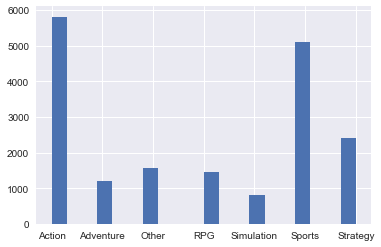

In [138]:
sort_by_year['genre'].hist(bins=20)

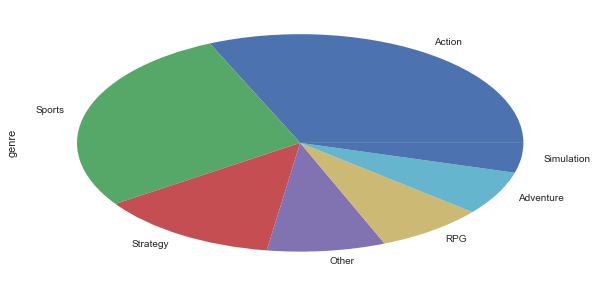

In [144]:
sort_by_year.genre.value_counts().plot(kind='pie', figsize=(10,5))